Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

def my_proportion_confint(count, nobs, alpha=0.05):
    count = np.asarray(count)
    nobs = np.asarray(nobs)

    q_ = count * 1. / nobs

    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

normal_interval = my_proportion_confint(1, 50)
print(normal_interval)
round(normal_interval[0], 4)

(-0.018805307081790987, 0.05880530708179099)


-0.0188

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [44]:
wilson_interval = proportion_confint(1, 50, method = 'wilson')
print(wilson_interval)
round(wilson_interval[0], 4)

(0.003539259271646236, 0.10495443589637815)


0.0035

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

In [42]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%, от неизвестного параметра $p$. Посмотрите, при каком значении $p$ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком $p$, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью $\pm0.01$ на уровне доверия 95%?

9604


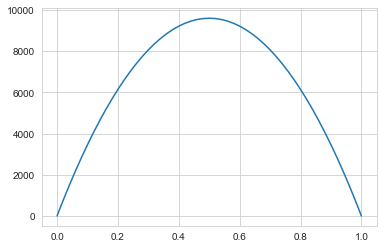

In [58]:
import seaborn as sns
sns.set_style('whitegrid')

param = np.linspace(0, 1, 51)
sample_size = [int(np.ceil(samplesize_confint_proportion(p, 0.01))) for p in param]
print(np.max(sample_size))
sns.lineplot(param, sample_size)